# Assignment 1

This notebook contains three exercises from the exercise sets we covered prior to moving the teaching online. It will count as one of the two assignments you need to submit to qualify for the exam. The deadline for handing in this assignment is April 3. You hand in by pushing your solutions to your folder in the exercise repo.

## Problems from exercise set 2

Ex. 2.1.1: The performance of a random forest classifier is highly sensitive to hyper parameters. Therefore, you should be intimately familiar with what the most important ones do. For each point below, explain what the hyper parameter pertaining to sklearn.ensemble.RandomForestClassifier controls, and how setting it either too low or too high (or True/False) might hurt model performance:

1. n_estimators
2. max_depth
3. max_features
4. bootstrap

### Solution 

1. n_estimators determines the amount of trees in the model. In general, the more trees the better the model performance, the amount of trees comes with a computational cost. Setting it too low, will make the classifier perform bad, while setting it too high will make computation unneccesarily long.

2. max_depth determinens how many split each tree should make. If each tree is to deep, there is a bigger possibility that'll sufffer from overfitting. On the other hand, if each tree is too small, it might suffer from underfitting. 

3. max_features is the numbers of features the model should consider when choosing the best feature to split. The higher the max_features is set, the more features the model can choose from, and therefore making each tree more accurate. On the other hand, setting it to high, will decrease the diversity of the trees, which will diminish the reason to use a random forrest estimator.  

4. bootstrap can be used to crate a bigger dataset, and create more variantion in the data

Ex. 2.1.2: For n_estimators > 1how should one set the hyper-parameters max_features and bootstrap so that all the trees in the ensemble end up identical?

#### 2.1.2. answer

For a random forrest with more than one estimator, setting max_features to the total amount of features, and bootstrap equal to 'False', will make all the tree in the ensemble end up identical.


When boottrapping is set to False, the sample in each tree will be alike. Since random forrest has a second source of variantion, random subset of features, it is necessary to use all of the features at every model. 

## Problems from exercise set 3

Ex. 3.1.2: Reproduce the figure from the slides that compares PCA, LDA, t-SNE and UMAP as applied to the digits dataset.

1. Do it for the digits dataset (same as in slides)
2. Do it also for the wine dataset. What problems do you observe if you don't standardize the wine dataset? Why is this not a problem with the digits data?
3. Comment on the differences you observe as well as the applicability (and necessity thereof) of different methods for different data.

Hint: You can use this class for making coloring easier. It lets you create a function that takes a category as input and returns an associated color. Read the docstring for usage example.

In [50]:
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.datasets import load_digits

import matplotlib.pylab as plt

In [51]:
from sklearn.preprocessing import StandardScaler


from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import umap

In [61]:
digits_data = load_digits() # load digits data set 
wine_data = load_wine() # Load wine data

In [79]:
def data_plotter(data, Std = True):
    X = data['data']
    y = data['target']
    
    
    if Std == True:
        sc = StandardScaler()
        X = sc.fit_transform(X)
        
    # PCA
    pca = PCA() 
    pca_fit = pca.fit_transform(X)

    # T-SNE
    tsne = TSNE()
    tsne_fit = tsne.fit_transform(X)

    # LDA
    LDA = LinearDiscriminantAnalysis()
    LDA_fit = LDA.fit_transform(X, y)

    # UMAP
    UMAP = umap.UMAP()
    UMAP_fit = UMAP.fit_transform(X)
    
    # Plotting four subplots
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2)
    ax1.scatter(pca_fit[:, 0], pca_fit[:,1], c = y)
    ax1.set_title('PCA')
    ax2.scatter(tsne_fit[:, 0], tsne_fit[:, 1], c = y)
    ax2.set_title('T-SNE')
    ax3.scatter(LDA_fit[:, 0], LDA_fit[:, 1], c = y)
    ax3.set_title('LDA')
    ax4.scatter(UMAP_fit[:,0], UMAP_fit[:,1], c = y)
    ax4.set_title('UMAP')
    plot = plt.show()    

    return(plot)

C:\Users\cha\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


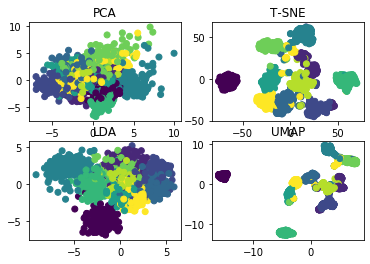

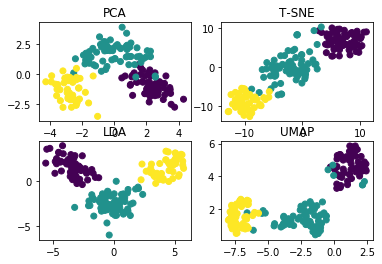

In [80]:
data_plotter(data = digits_data, Std = True)
# data_plotter(data = digits_data, Std = False)


data_plotter(data = wine_data, Std = True)
# data_plotter(data = wine_data, Std = False)


2. 
Since the digits data set 64-dimensional dataset where all of the dimensions all lay on the same scale, standardizing will not have the same effect. On the other hand, the dimensions of the wine dataset are all scaled very differently, and therefore it have a big effect standardizing

3. 
Both PCA and LDA are having a hard time separating digits, both of the methods are linear. Since the digits properly don't correlate in a linear way, PCA and LDA are not very well suited for separating handwritten digits. T-SNE and UMAP are both non-linear, and therefor way better suited for separating this kind of data. The situation is a bit different for the wine dataset, where PCA and LDA are doing a better job that T-SNE and UMAP. This might be because that the wine data is characterized in a more linear way. 

## Problems from exercise set 4

In this problem we will try to implement and understand some of the ideas used in Athey, Imbens (2015) to develop Honest Inference in desicion tree models. The paper begins by covering honesty in a setting of population averages, and for estimating conditional means; so you will need to look towards the second half of the paper to get an impression of it's use for treatment-effect estimation.

Ex. 4.2.1: What does it mean that a tree is honest? In particular what are the implications in terms of

- The intuition for why honesty is required in order to get good local treatment effect estimates?
  The practical implementation of the DT algorithm?

- The intuition for why honesty is required in order to get good local treatment effect estimates? 
  The practical implementation of the DT algorithm?


The tree is hones when the data is split into two. One part for constructing partitions, and one for computing the treatment effects for each of the subsamples. Using this method the same data is not just for training the machine and estimating the treatment effects 